# Preamble

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.array
import cartopy.crs as ccrs
import pickle
import matplotlib.colors as colors
import datetime as dt
import pickle
from matplotlib.colors import BoundaryNorm
import glob
import calendar
import warnings
warnings.filterwarnings('ignore')
import dask
import matplotlib.gridspec as gridspec

In [88]:
import sys
from importlib import reload
sys.path.append('/home/563/ab2313/MJO/functions')

import phase_calc_functions as phase_calc
import phase_plot_functions as phase_plot
import subphase_calc_functions as subphase_calc
import access_functions as af
import access_plot_functions as apf
import load_dataset as load

import phase_fortnight_calc as phase_for
import phase_weekly as phase_w

In [90]:
import phase_weekly_sub as ps_w
import rank_hist_plots as rhp

In [4]:
load = reload(load)
awap, access, rmm_obs, rmm_access = load.load_accessifies_variables()

4158 4158
4158 4158


In [5]:
rmm_obs = rmm_obs.drop(['RMM1','RMM2'])

In [6]:
awap_split = subphase_calc.split_into_subphase(awap, rmm_obs)

In [7]:
awap_split

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, phase: 4, time: 4158)
Coordinates:
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * time     (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2012-12-31
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...

# Count

## Maps

### Calculation

In [8]:
ps_w = reload(ps_w)
count_perc, count_anom = ps_w.count_anomalies_phase_week(awap_split, awap, rmm_obs)

In [106]:
ps_w = reload(ps_w)
access_count_raw, access_count_anom, count_stor, anom_stor\
        = ps_w.ensemble_func_all(access, rmm_access, ps_w.count_anomalies_phase_week)

### Maps

In [10]:
import access_plot_functions as apf

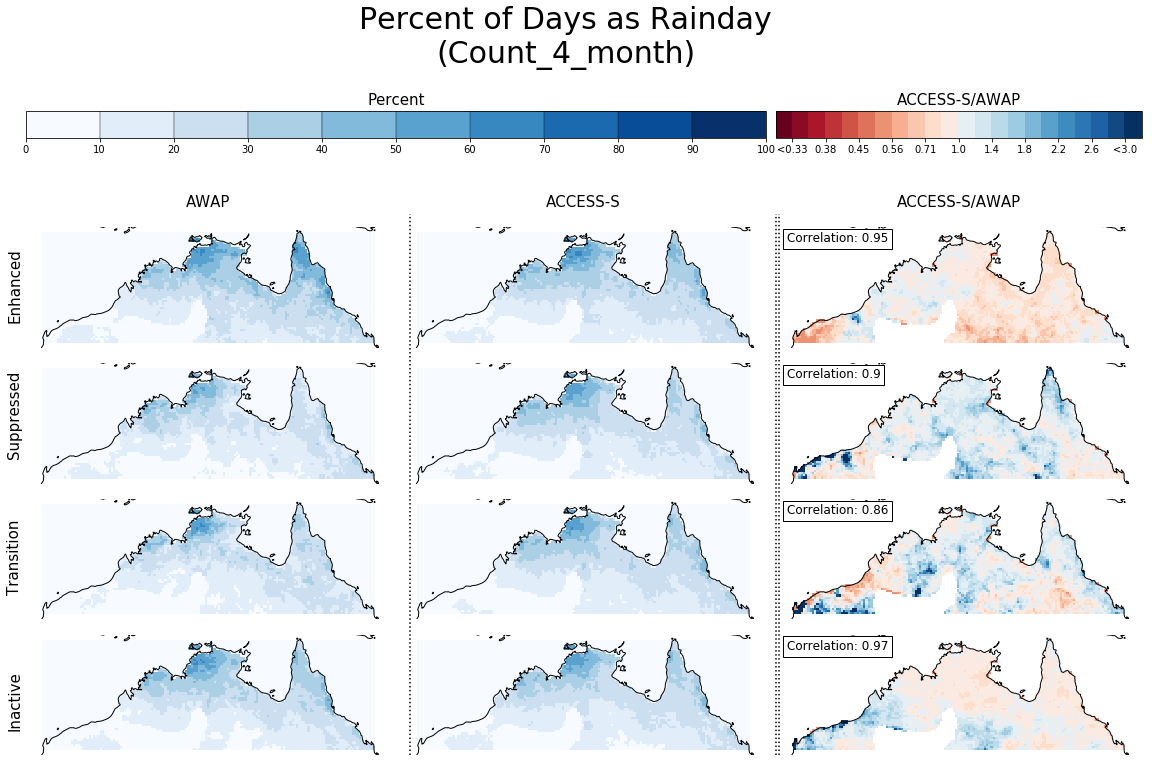

In [165]:
apf = reload(apf)

week = '4'
month = 'early'
save_name = f'Count_{week}_month'
apf.comparison_plot(count_perc.sel(month = month, week = week), 
                           access_count_raw.sel(month = month, week = week),
                          plot_max = 100, vmax = 3.2,
                           rain_type = f'Percent of Days as Rainday\n({save_name})',
                           cbar1_title = 'Percent', cbar2_title = 'ACCESS-S/AWAP',
                          savefig = 0, savedir = savedir, save_name = save_name)

Count_2_late_anomaly has been saved


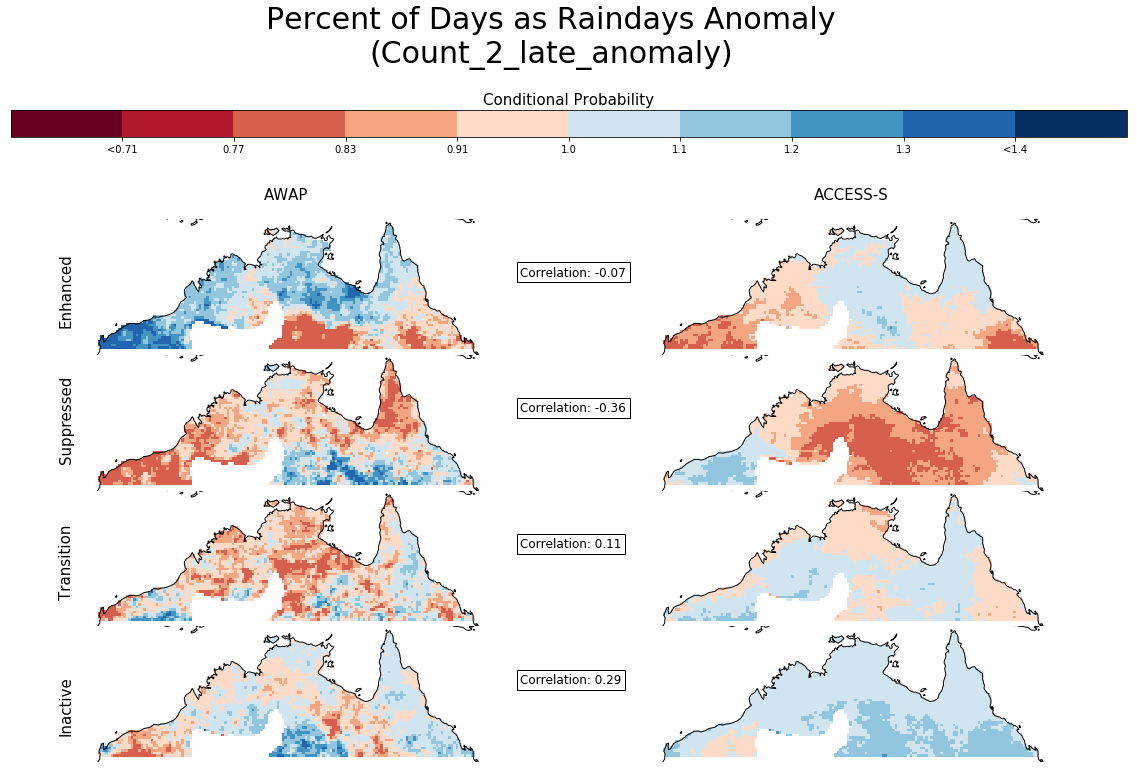

In [12]:
week = '2'
month = 'late'
save_name = f'Count_{week}_{month}_anomaly'
apf = reload(apf)
apf.anomaly_plot_subphases(count_anom.sel(month = month, week = week),
                           access_count_anom.sel(month = month, week = week) ,
                     rain_type = f'Percent of Days as Raindays Anomaly\n({save_name})', vmax = 1.5
                    ,cbar_title = 'Conditional Probability',
                    savefig = 1, savedir = savedir, save_name = save_name)

### Timeseries

In [93]:
import access_functions_weekly as afw
import access_plot_functions_2 as apf2

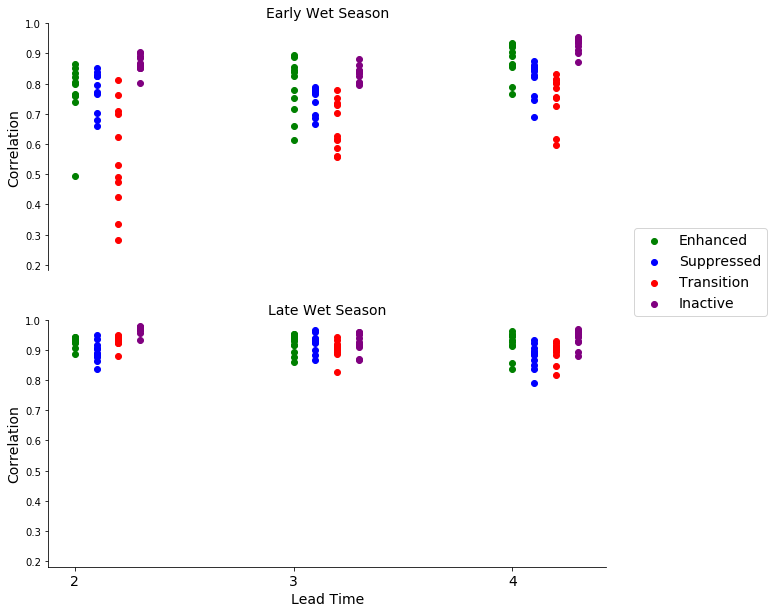

In [94]:
afw = reload(afw)
apf2 = reload(apf2)

count_raw_pattern = afw.list_pattern_correlation(count_perc, count_stor)


apf2.weekly_stacked_patter_correlation_timeseries(count_raw_pattern)

In [ ]:
afw = reload(afw)
count_anom_pattern = afw.list_pattern_correlation(count_anom, anom_stor)

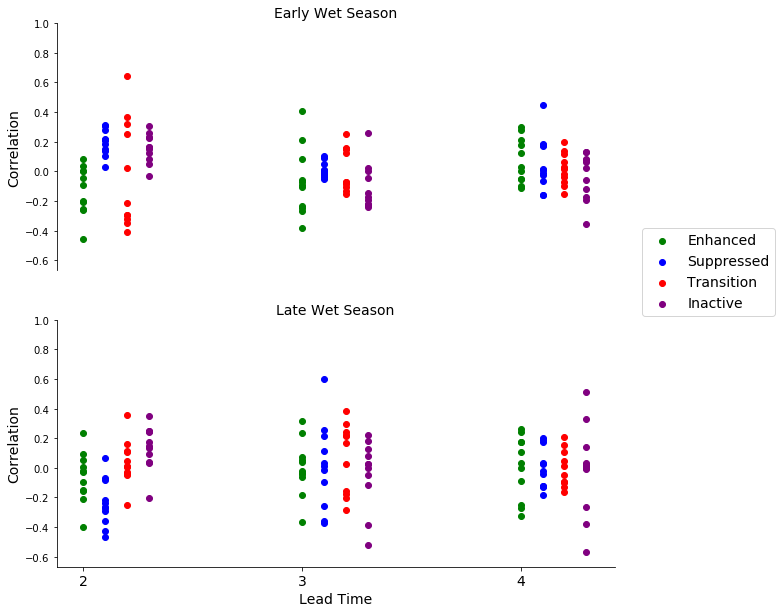

In [108]:
apf2 = reload(apf2)

apf2.weekly_stacked_patter_correlation_timeseries(count_anom_pattern)

## Median Absolute Error

In [ ]:
subphase_calc = reload(subphase_calc)
# Split access into the subphases: enhanced, suppressed, transition and inactive.
access_split = af.access_rmm_split(access, rmm_access)

In [ ]:

obs = awap_split
mod = access_split

weeks = [np.arange(7,15), np.arange(15, 22), np.arange(22, 29)]

for week  in weeks:
    obs_sub = obs.where(obs.time.dt.day.isin(week))
    obs_count = obs_sub.groupby('time.month').apply(rh.group_resample)
    
    
    mod_sub = mod.where(mod.time.dt.day.isin(week))
    mod_count = mod_sub.groupby('time.month').apply(rh.group_resample)

## Rank Histograms

In [98]:
savedir_rh_count_all = 'rank_hist/count_all/'

### Calculation

In [8]:
import rank_histograms as rh

In [10]:
subphase_calc = reload(subphase_calc)
# Split access into the subphases: enhanced, suppressed, transition and inactive.
access_split = af.access_rmm_split(access, rmm_access)

1 2 3 4 5 6 7 8 9 10 11 

In [341]:
# This is the function to be used, this could be a resample via count or meanz
rh = reload(rh)
function = rh.group_resample_count

# The data set that are going into this
obs = awap_split
mod = access_split

# The actual functin
binned_count = rh.weekly_ranks_bins(obs, mod, function)


### Calculation Verificatoin

Count Methods

In [344]:
weeks = [np.arange(7,15), np.arange(15, 22), np.arange(22, 29)]

obs = awap_split
mod = access_split
function = rh.group_resample_count
for week in weeks[0]:

    # Geeting just a single weeks worth of data from all the different months
    obs_sub = obs.where(obs.time.dt.day.isin(week), drop = True)
#         obs_index = function(obs_sub)


    obs_index = obs_sub.groupby('time.month').apply(function)


    mod_sub = mod.where(mod.time.dt.day.isin(week), drop = True)
#         mod_index = function(mod_sub)

    mod_index = mod_sub.groupby('time.month').apply(function)

In [359]:
obs_ss = obs_sub.sel(phase = 'enhanced')
obs_ss

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, time: 137)
Coordinates:
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * time     (time) datetime64[ns] 1990-01-14 1990-02-14 ... 2012-12-14
    phase    <U8 'enhanced'
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...

In [361]:
rh = reload(rh)

In [364]:
function = rh.group_resample_count
t1 = obs_ss.groupby('time.month').apply(function)

In [365]:
function = rh.group_resample_count_2
t2  =o bs_ss.groupby('time.month').apply(function)

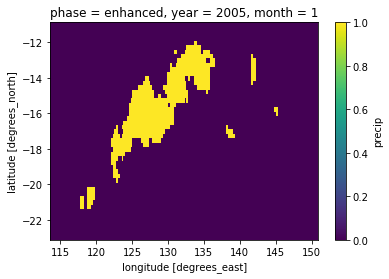

In [374]:
t1.sel(year = 2005, month = 1).precip.plot()

In [ ]:
obs = awap_split

In [378]:
function = rh.group_resample_count
sub1 = obs.groupby('time.month').apply(function)

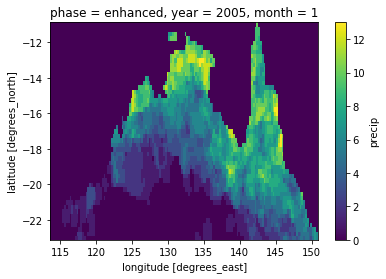

In [379]:
sub1.sel(year = 2005, month = 1, phase = 'enhanced').precip.plot()

In [413]:
obs = awap_split
mod_1 = access_split.isel(ensemble = 2)

In [396]:
obs_w = obs.where(obs.time.dt.day.isin(np.arange(7,15)), drop = True)

sub2 = obs_w.groupby('time.month').apply(function)

In [417]:
mod_w = mod_1.where(mod_1.time.dt.day.isin(np.arange(7,15)), drop = True)

sub2_mod = mod_w.groupby('time.month').apply(function)

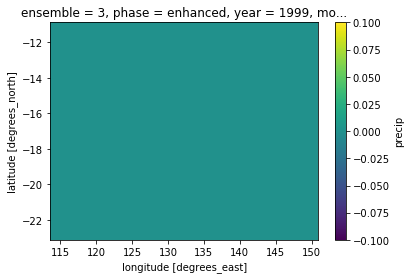

In [419]:
sub2_mod.sel(year = 1999, month = 1, phase = 'enhanced').precip.plot()

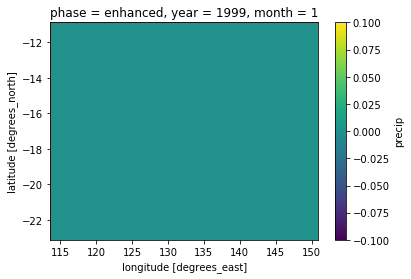

In [412]:
sub2.sel(year = 1999, month = 1, phase = 'enhanced').precip.plot()

In [420]:
greater = sub2.where(sub2.precip > sub2_mod)

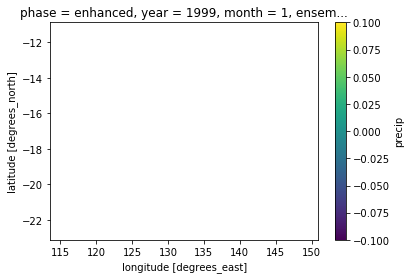

In [421]:
greater.sel(year = 1999, month = 1, phase = 'enhanced').precip.plot()

Verifying the different groupy methods

In [259]:
c1 = awap.groupby('time.year').count()

In [262]:
c2 = awap.apply(rh.group_resample_count)

In [263]:
c1.equals(c2)

True

Thus, both of these method are the same, but the second method allows other things to be passed into the outer-functions, such as mean or sum.

Rank Methods

In [202]:
awap_split

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, phase: 4, time: 4158)
Coordinates:
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * time     (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2012-12-31
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...

In [201]:
access_split

<xarray.Dataset>
Dimensions:   (ensemble: 11, lat: 49, lon: 149, phase: 4, time: 4158)
Coordinates:
  * phase     (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
  * lat       (lat) float32 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * lon       (lon) float32 113.75 114.0 114.25 114.5 ... 150.25 150.5 150.75
  * time      (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2012-12-31
  * ensemble  (ensemble) int64 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    precip    (ensemble, phase, time, lat, lon) float32 nan nan nan ... nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...
    Time:         Only for the wet-season

In [209]:
awap_sub = awap_split.sel(phase = 'enhanced').groupby('time.year').count()
access_sub = access_split.sel(phase = 'enhanced').groupby('time.year').count()


In [ ]:
def return_awap_greater_access(obs_count, mod_count):
    
    ens_stor = []

    for ensemble in mod_count.ensemble.values:
        mod_single = mod_count.sel(ensemble  = ensemble)

        above = obs_count.where(obs_count.precip >= mod_single_single.precip)


        ens_stor.append(above)

    awap_greater = xr.concat(ens_stor, pd.Index(mod_count.ensemble.values, name = 'ensemble'))
    
    return awap_greater

In [214]:
ens_stor = []

for ensemble in access_sub.ensemble.values:
    access_single = access_sub.sel(ensemble  = ensemble)

    above = awap_sub.where(awap_sub.precip > access_single.precip)
    
    
    ens_stor.append(above)

full = xr.concat(ens_stor, pd.Index(access_sub.ensemble.values, name = 'ensemble'))

In [220]:
full

<xarray.Dataset>
Dimensions:   (ensemble: 11, lat: 49, lon: 149, year: 23)
Coordinates:
    phase     <U8 'enhanced'
  * year      (year) int64 1990 1991 1992 1993 1994 ... 2008 2009 2010 2011 2012
  * lat       (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * lon       (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * ensemble  (ensemble) int64 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    precip    (ensemble, year, lat, lon) float64 nan 12.0 12.0 ... nan nan nan

In [223]:
rank = full.count(dim = 'ensemble')
rank['precip'] = rank.precip + 1

In [226]:
rank

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, year: 23)
Coordinates:
    phase    <U8 'enhanced'
  * year     (year) int64 1990 1991 1992 1993 1994 ... 2008 2009 2010 2011 2012
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
Data variables:
    precip   (year, lat, lon) int64 1 12 12 12 12 12 12 12 ... 1 1 1 1 1 1 1 1

(array([ 2.,  1.,  2.,  1.,  3.,  1.,  0.,  1.,  2., 10.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

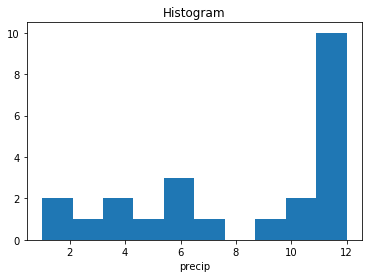

In [236]:
rank.sel(lat = -18, lon = 145).precip.plot.hist()

In [241]:
full2 = access_sub.groupby('ensemble').apply(rh.greater_than, awap_y = awap_sub)
full2

<xarray.Dataset>
Dimensions:   (ensemble: 11, lat: 49, lon: 149, year: 23)
Coordinates:
    phase     <U8 'enhanced'
  * year      (year) int64 1990 1991 1992 1993 1994 ... 2008 2009 2010 2011 2012
  * lat       (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * lon       (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * ensemble  (ensemble) int64 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    precip    (ensemble, year, lat, lon) float64 nan 12.0 12.0 ... nan nan nan

In [242]:
rank2 = full2.count(dim = 'ensemble')

In [243]:
rank2

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, year: 23)
Coordinates:
    phase    <U8 'enhanced'
  * year     (year) int64 1990 1991 1992 1993 1994 ... 2008 2009 2010 2011 2012
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
Data variables:
    precip   (year, lat, lon) int64 0 11 11 11 11 11 11 11 ... 0 0 0 0 0 0 0 0

(array([ 2.,  1.,  2.,  1.,  3.,  1.,  0.,  1.,  2., 10.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

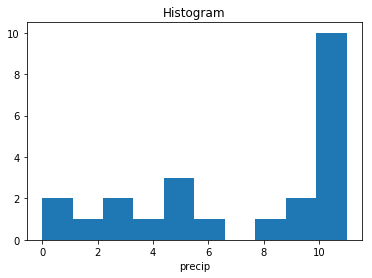

In [245]:
rank2.sel(lat = -18, lon = 145).precip.plot.hist()

In [250]:
rank2['preicp'] = rank2.precip + 1

In [252]:
rank2

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, year: 23)
Coordinates:
    phase    <U8 'enhanced'
  * year     (year) int64 1990 1991 1992 1993 1994 ... 2008 2009 2010 2011 2012
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
Data variables:
    precip   (year, lat, lon) int64 0 11 11 11 11 11 11 11 ... 0 0 0 0 0 0 0 0
    preicp   (year, lat, lon) int64 1 12 12 12 12 12 12 12 ... 1 1 1 1 1 1 1 1

In [255]:
t1 = rank.sum(dim = 'year')
t2 = rank2.sum(dim = 'year')
tdiv = t1/t2

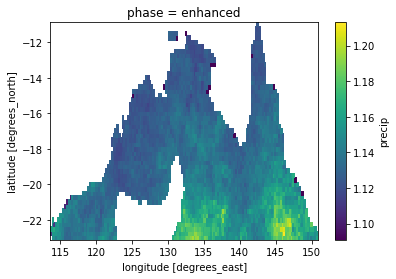

In [257]:
tdiv.precip.plot()

### Maps

In [268]:
binned_count

<xarray.Dataset>
Dimensions:  (bin_: 11, lat: 49, lon: 149, month: 2, phase: 4, week: 3)
Coordinates:
  * month    (month) <U5 'early' 'late'
  * week     (week) <U1 '2' '3' '4'
  * bin_     (bin_) int64 1 2 3 4 5 6 7 8 9 10 11
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
Data variables:
    hist_    (month, week, bin_, phase, lat, lon) float64 0.0 0.0 ... 1.0 1.0

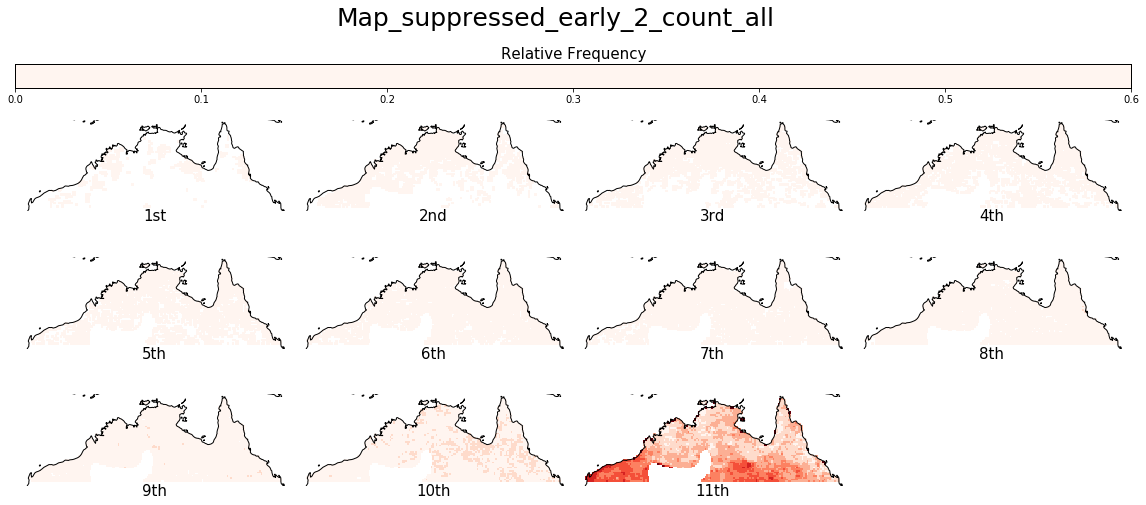

In [271]:
rhp = reload(rhp)

phase = 'suppressed'
month = 'early'
week = '2'
single_phase = binned_count.sel(phase = phase, month = month, week = week)

save_title = f'Map_{phase}_{month}_{week}_count_all'

rhp.rank_maps(single_phase,savetitle = save_title)

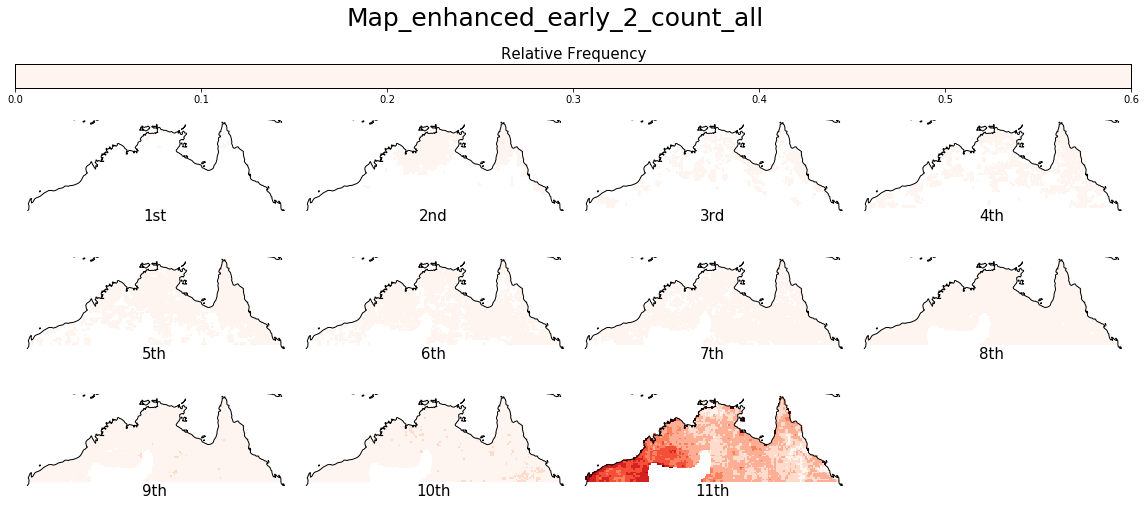

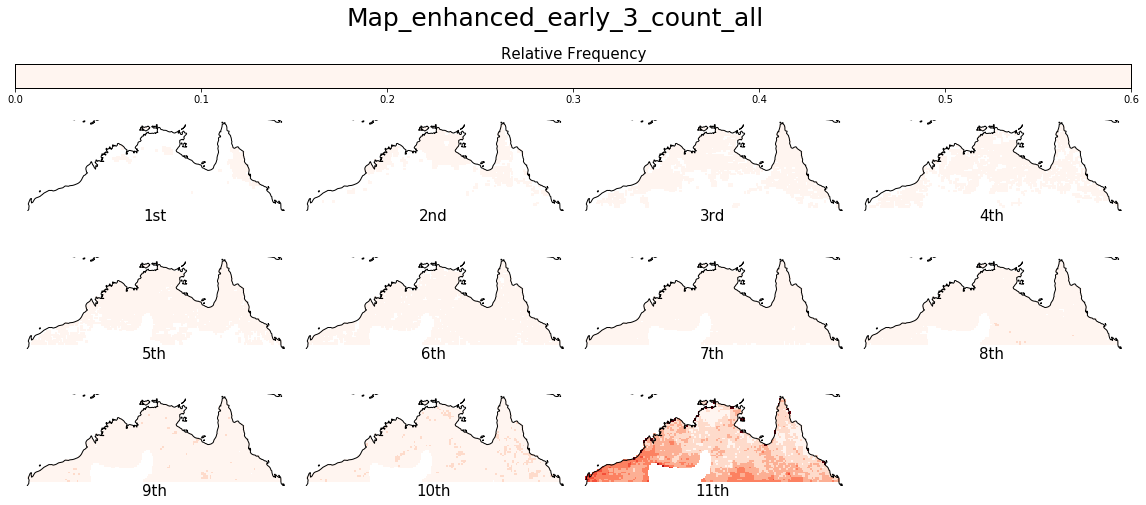

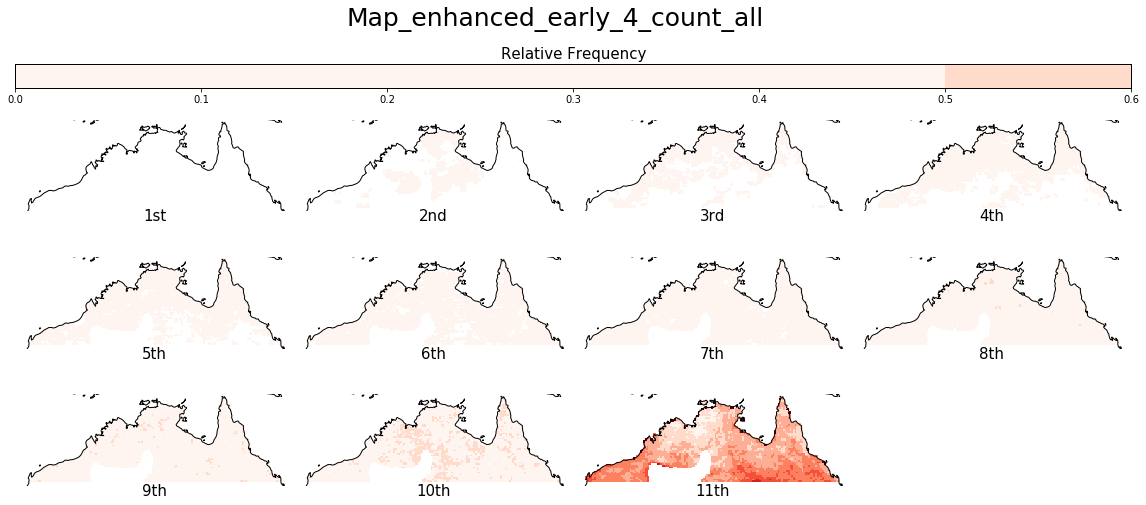

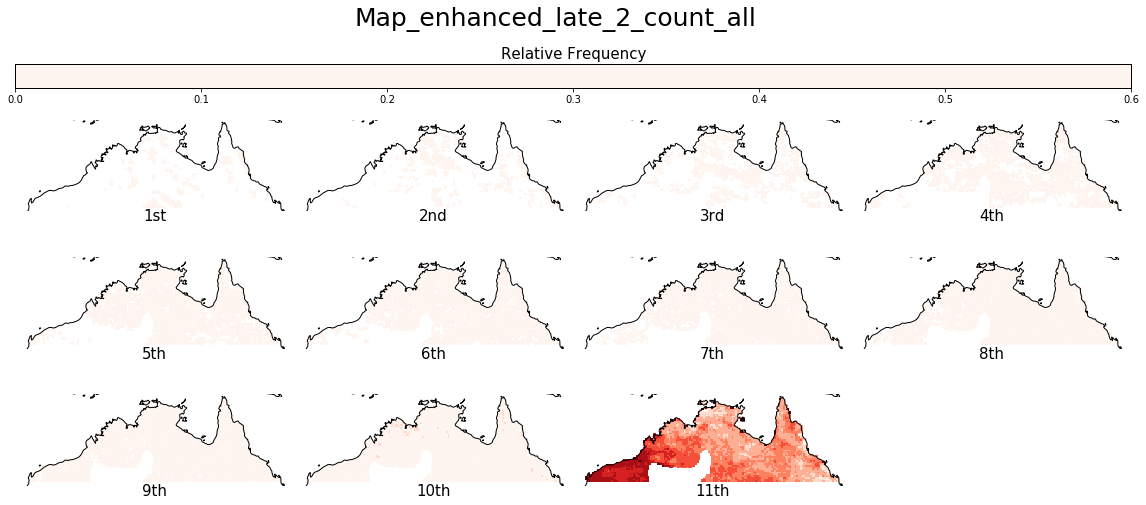

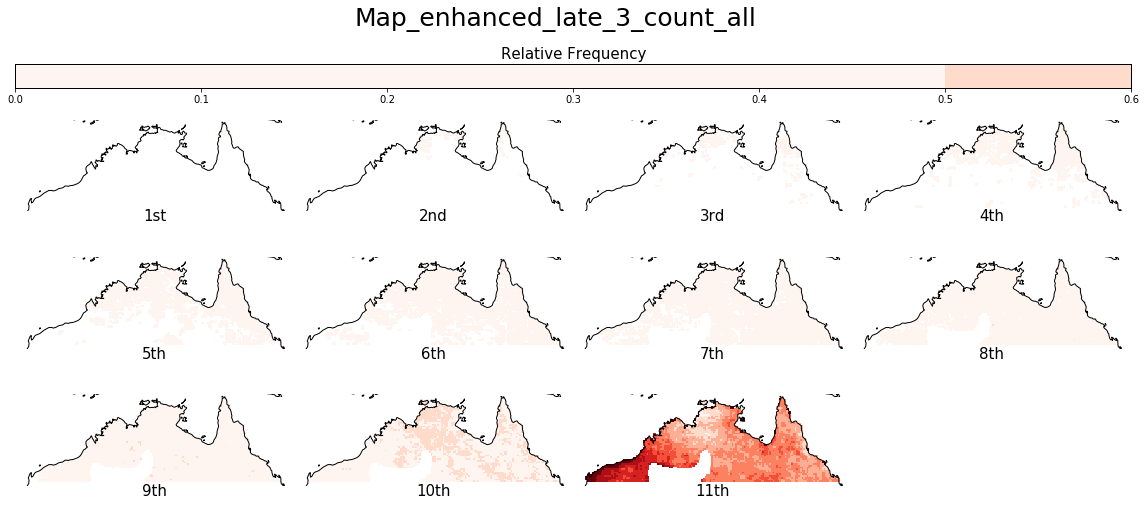

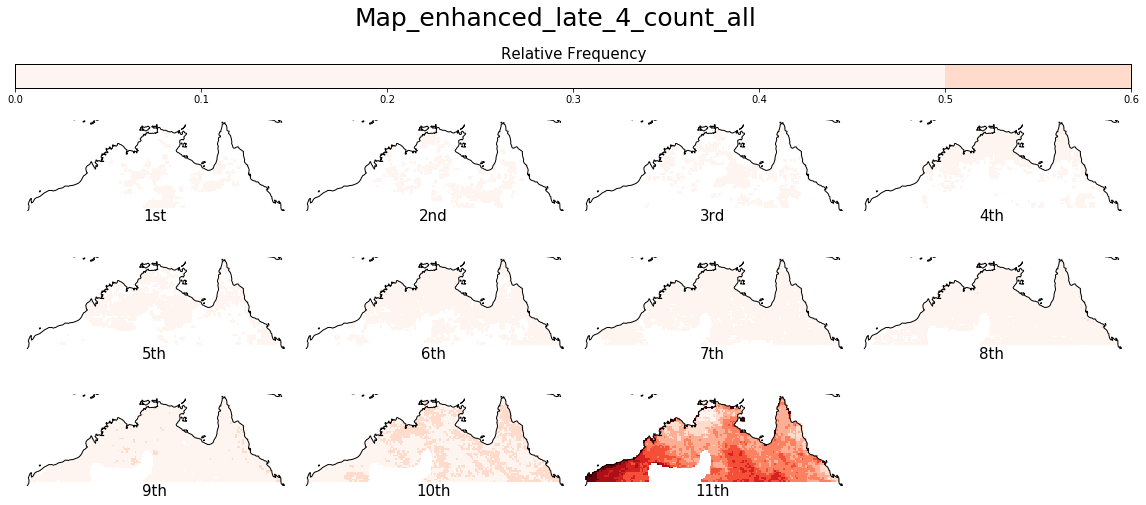

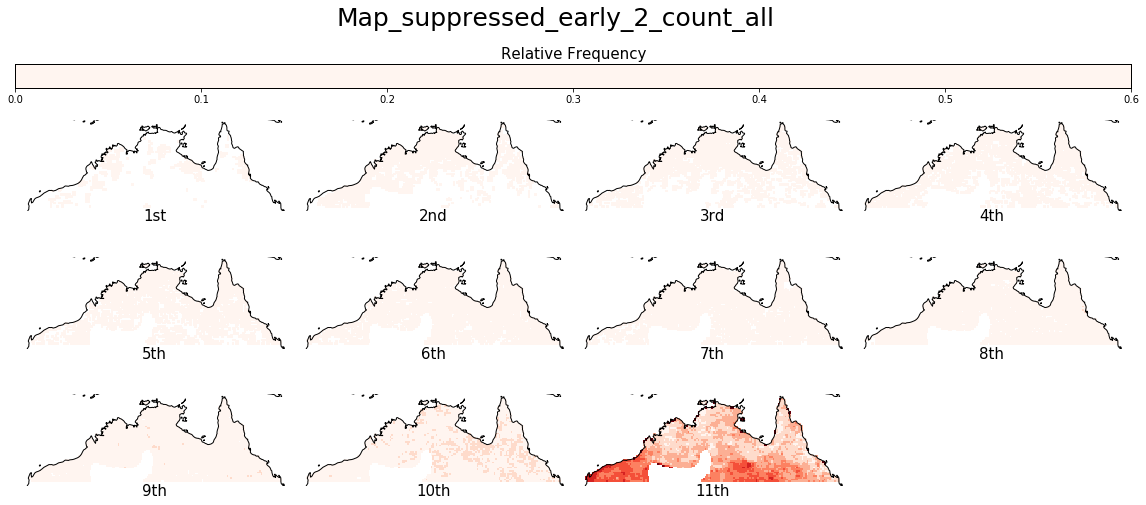

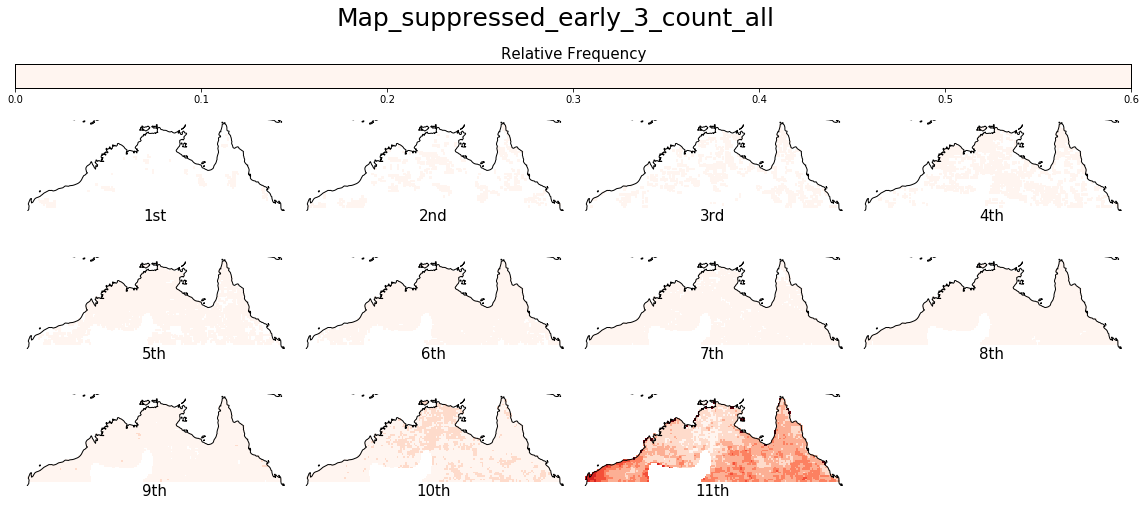

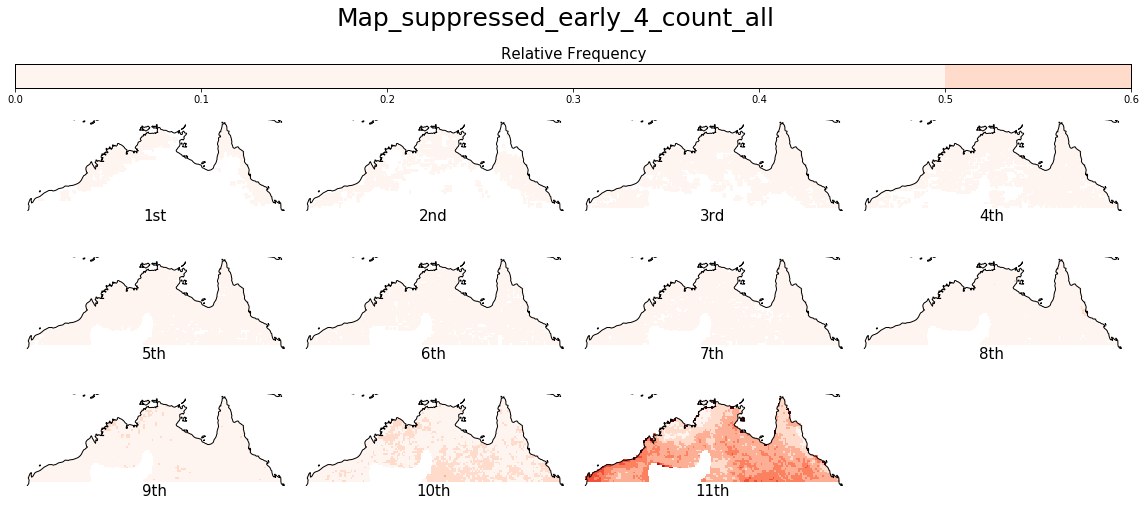

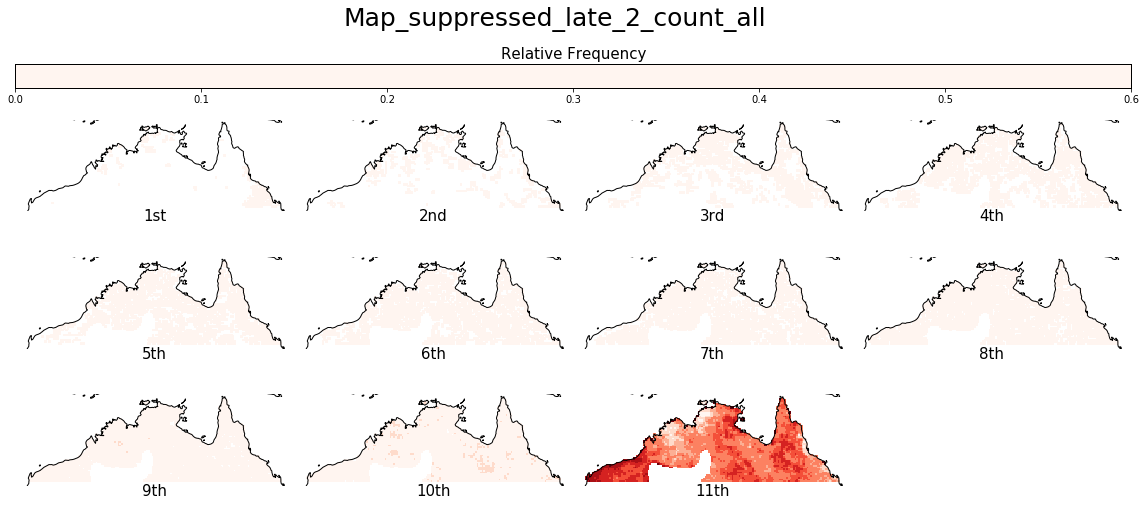

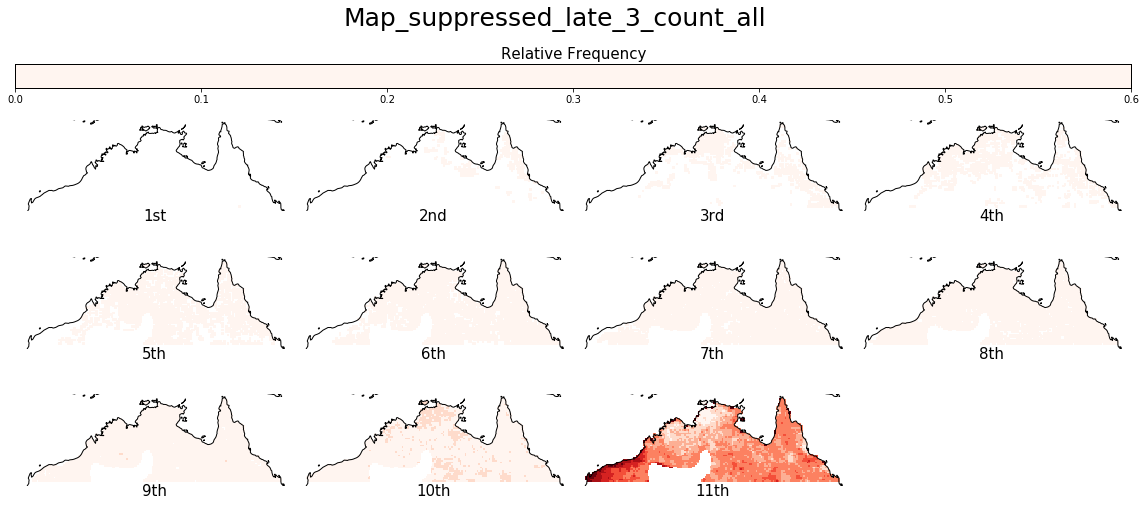

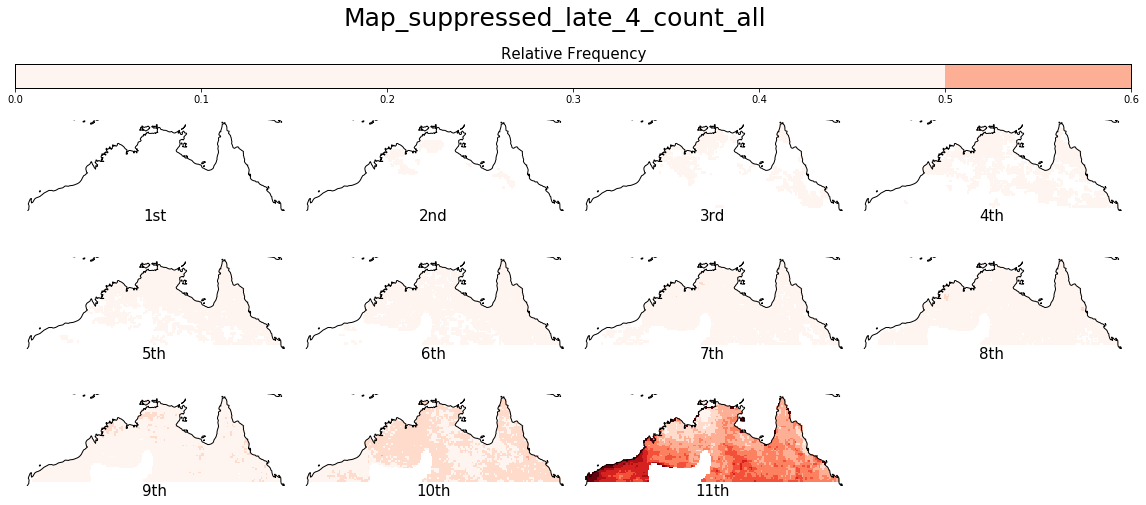

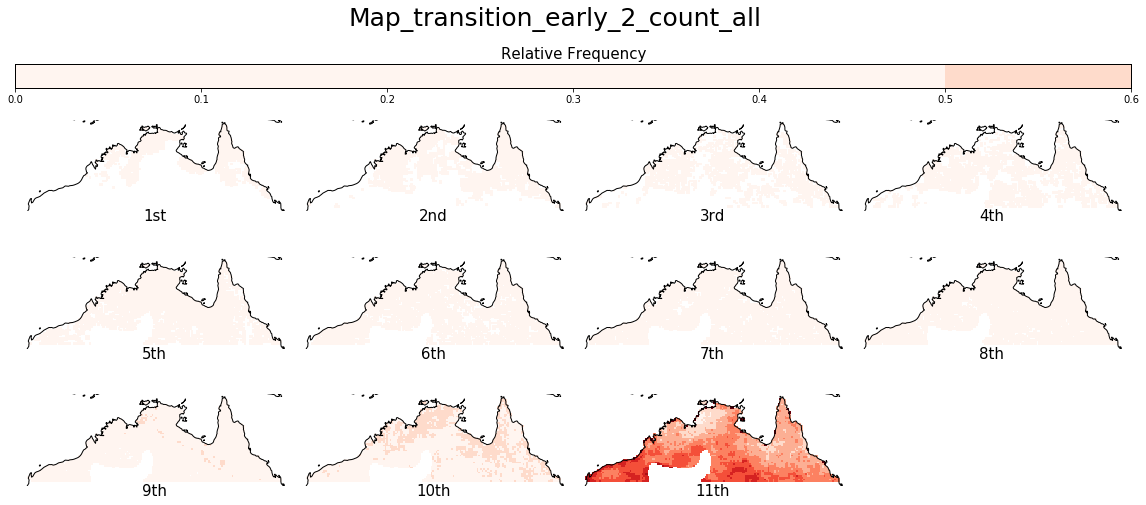

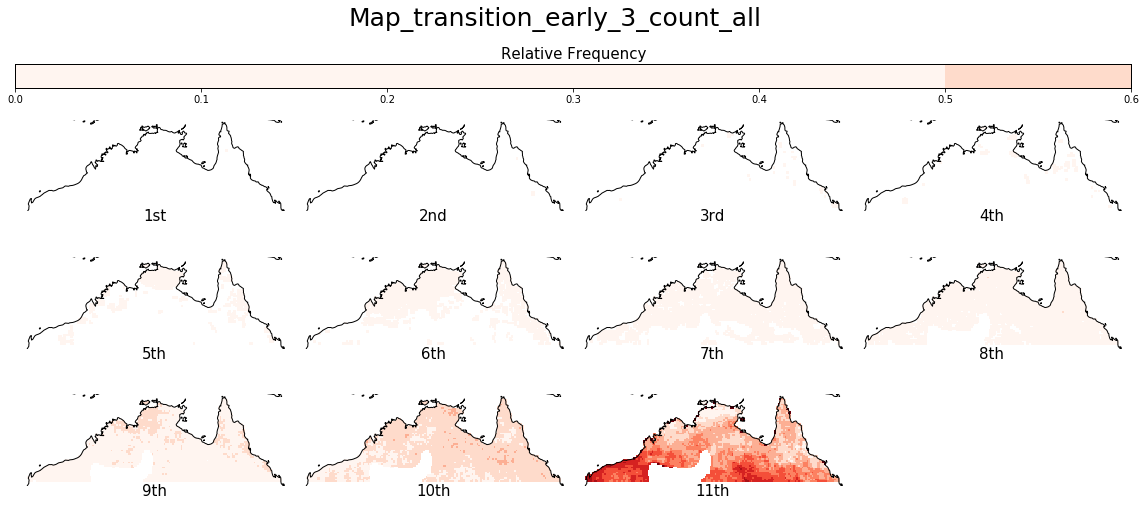

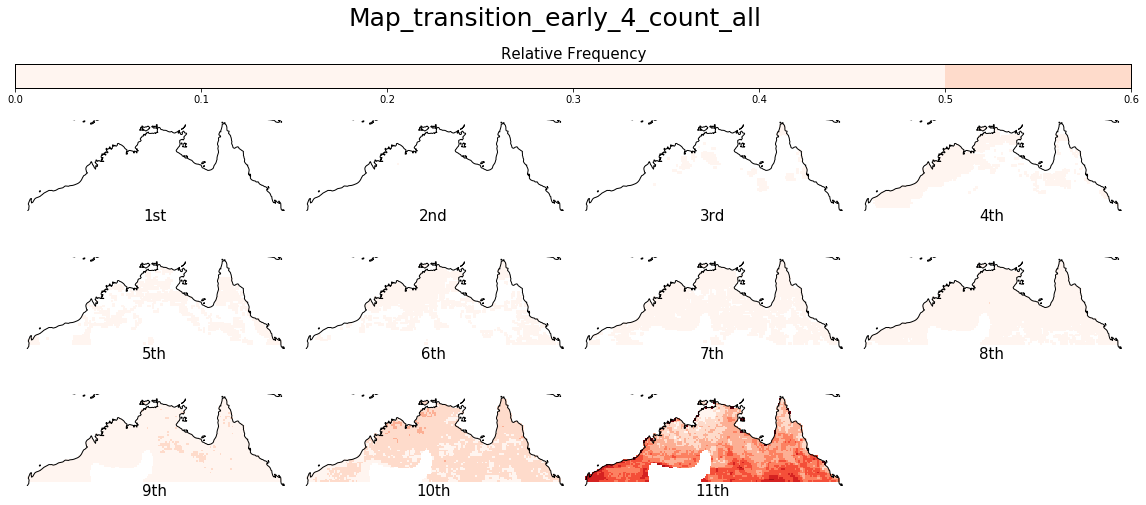

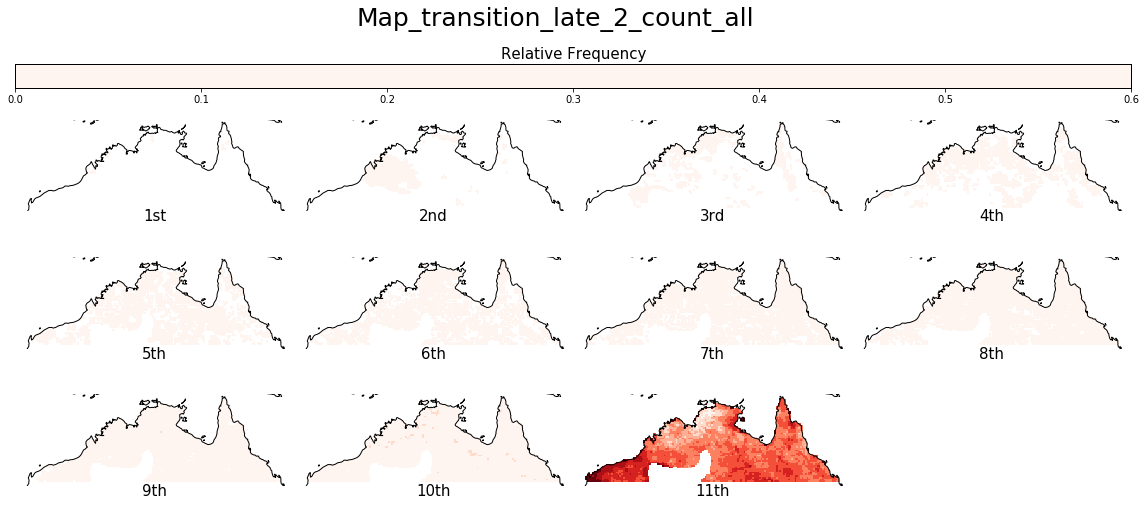

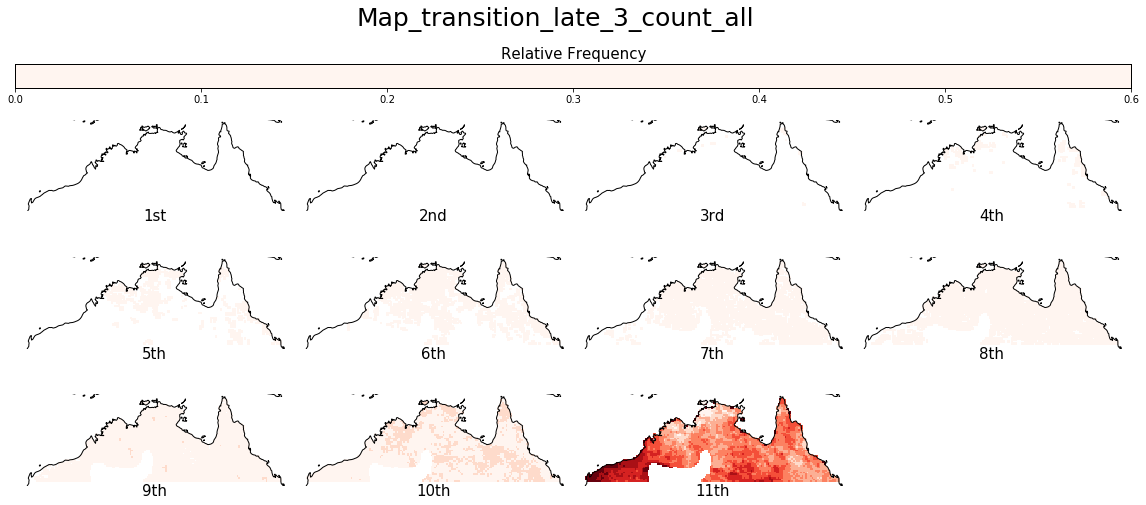

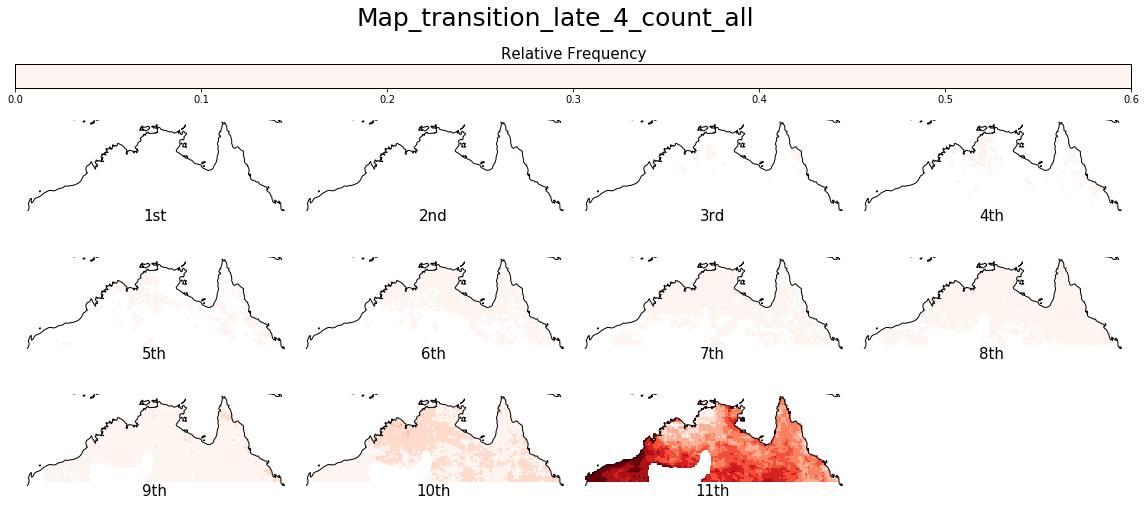

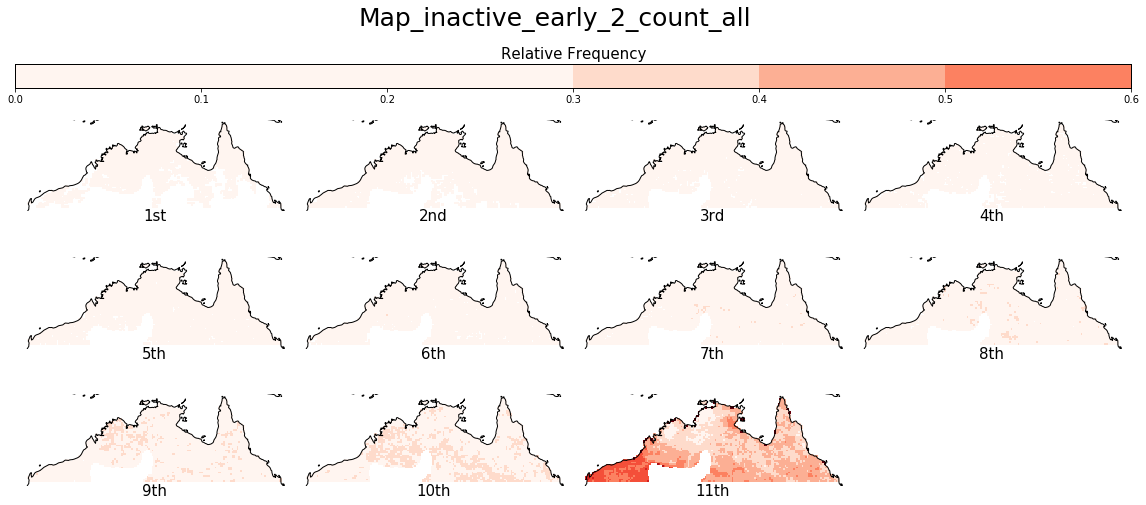

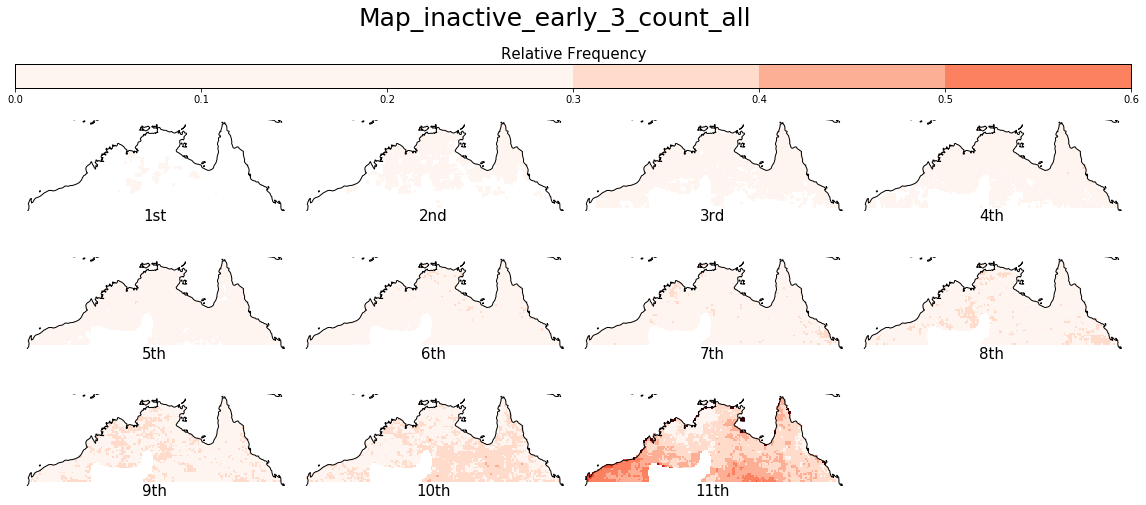

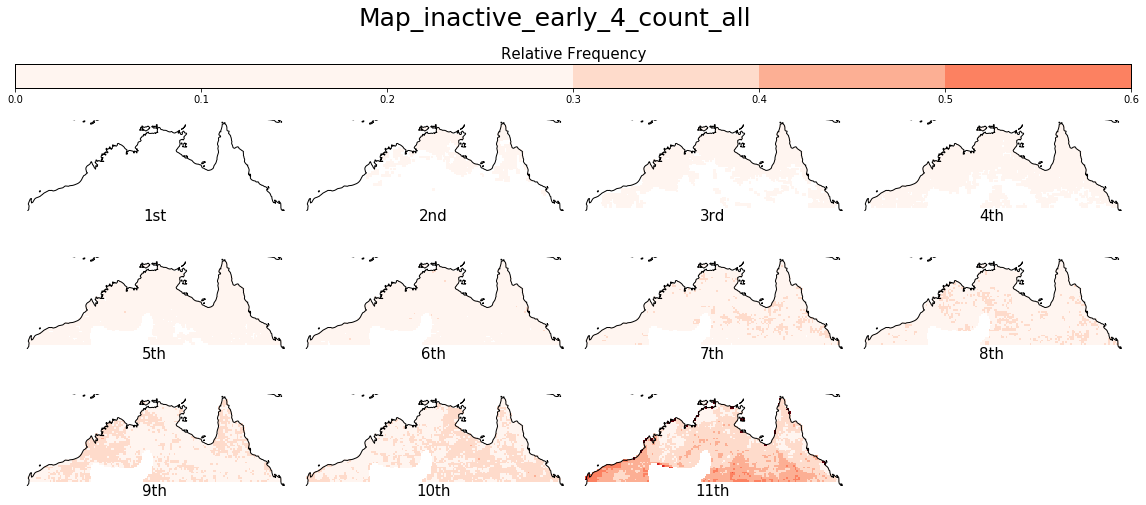

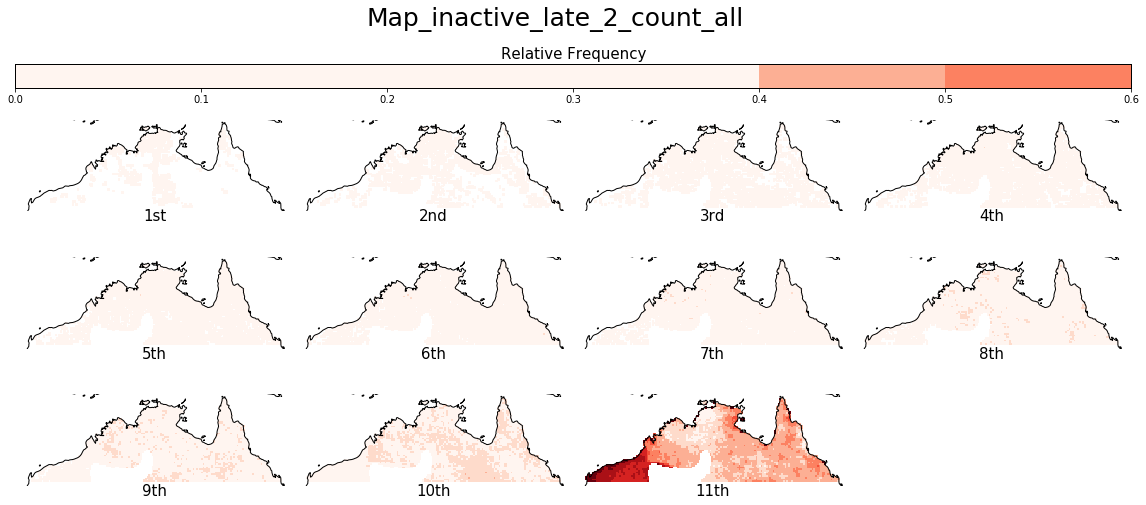

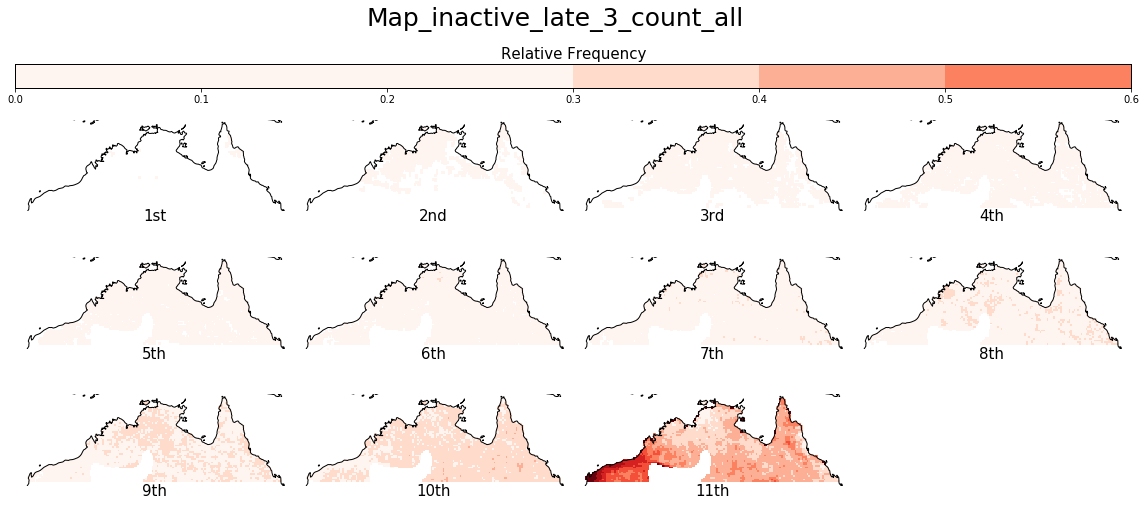

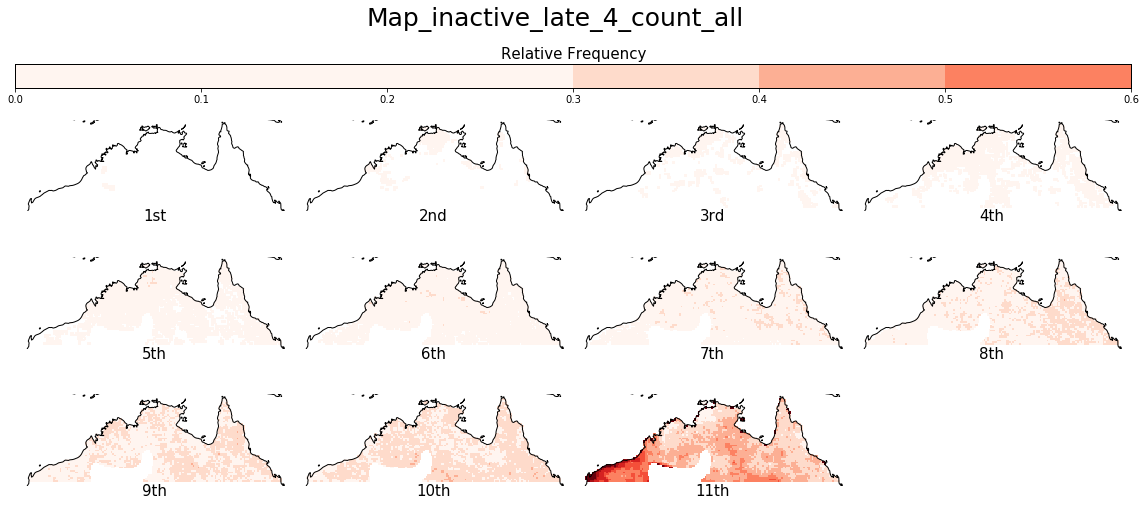

In [272]:
rhp = reload(rhp)

for phase in binned_count.phase.values: #4
    for month in binned_count.month.values: #2    TOTAL LOOPS = 4 x 2 x 3 = 24
        for week in binned_count.week.values: #3
            single_phase = binned_count.sel(phase = phase, month = month, week = week)

            save_title = f'Map_{phase}_{month}_{week}_count_all'

            rhp.rank_maps(single_phase,savefig = 1, savetitle = save_title, savedir  = savedir_rh_count_all)

### argmax

In [279]:
binned_count

<xarray.Dataset>
Dimensions:  (bin_: 11, lat: 49, lon: 149, month: 2, phase: 4, week: 3)
Coordinates:
  * month    (month) <U5 'early' 'late'
  * week     (week) <U1 '2' '3' '4'
  * bin_     (bin_) int64 1 2 3 4 5 6 7 8 9 10 11
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
Data variables:
    hist_    (month, week, bin_, phase, lat, lon) float64 0.0 0.0 ... 1.0 1.0

In [273]:
rh = reload(rh)
argmax = rh.calc_argmax(binned_count)

In [278]:
argmax

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, month: 2, phase: 4, week: 3)
Coordinates:
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * month    (month) <U5 'early' 'late'
  * week     (week) <U1 '2' '3' '4'
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    argmax_  (month, week, phase, lat, lon) float64 nan 11.0 11.0 ... nan nan

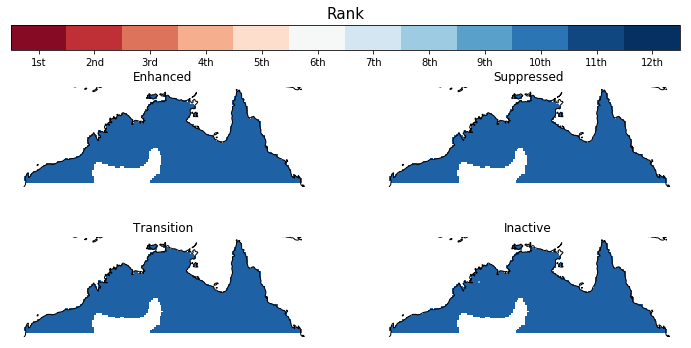

In [288]:
rh = reload(rh)
rhp = reload(rhp)
rhp.argmax_map_plot(argmax.sel(month = 'early', week  = '2'))

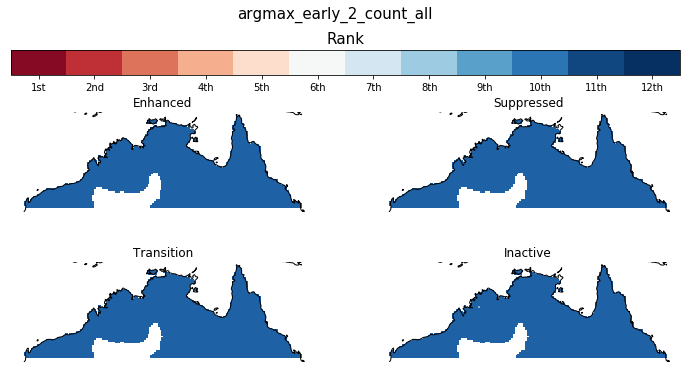

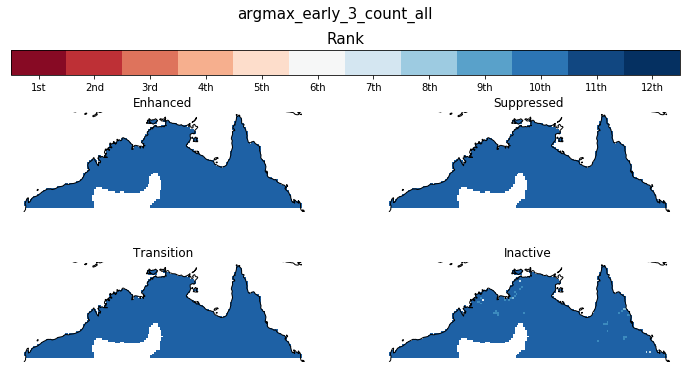

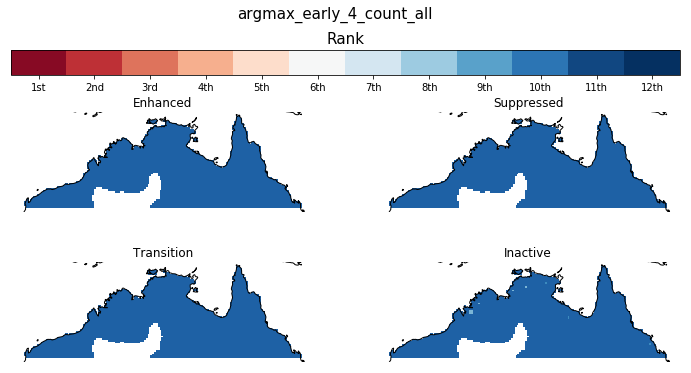

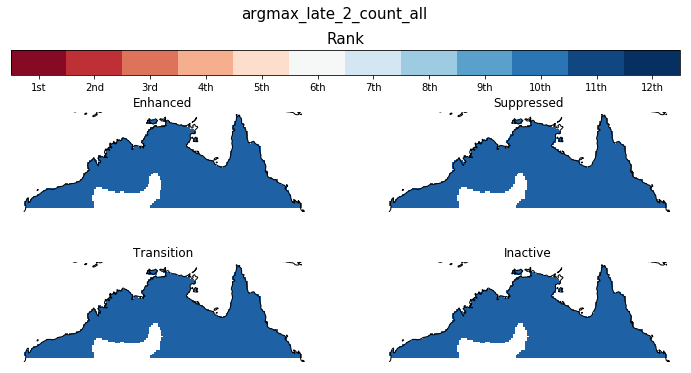

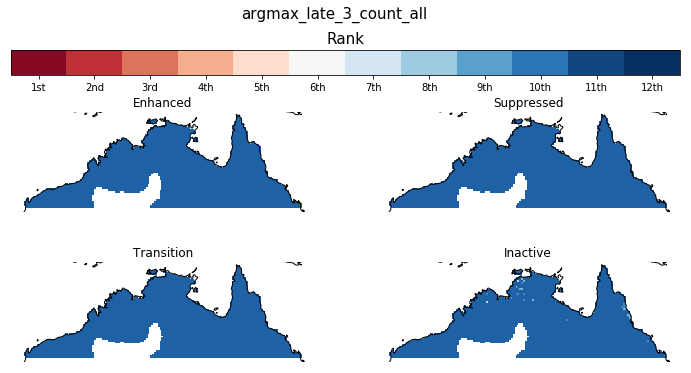

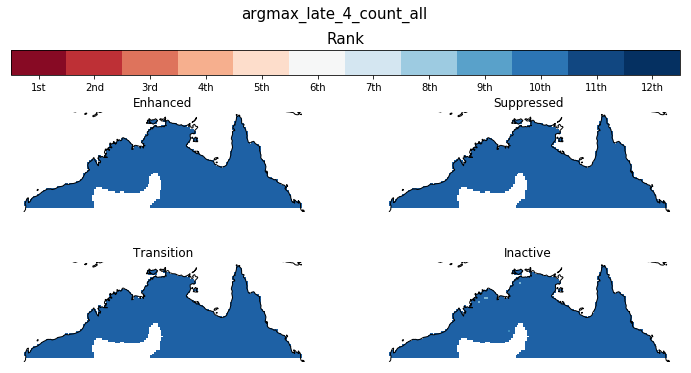

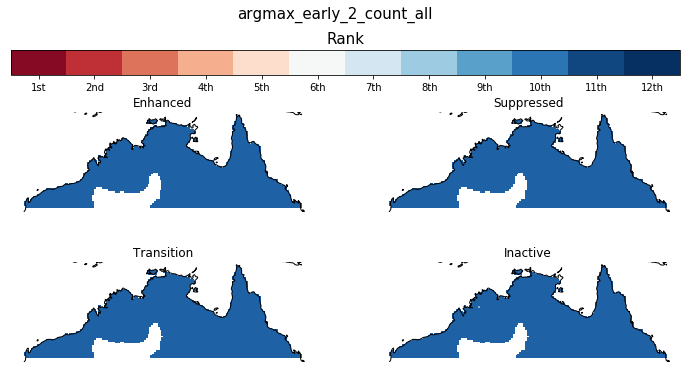

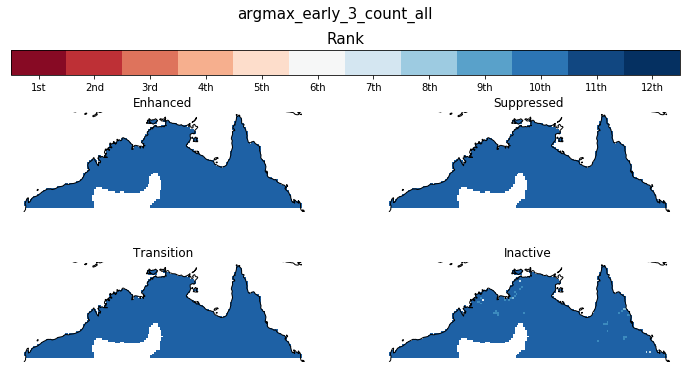

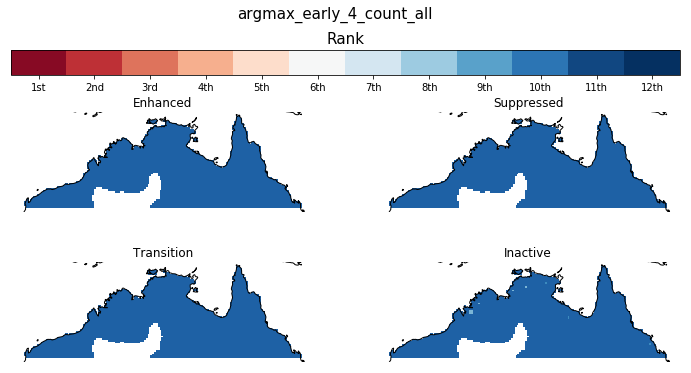

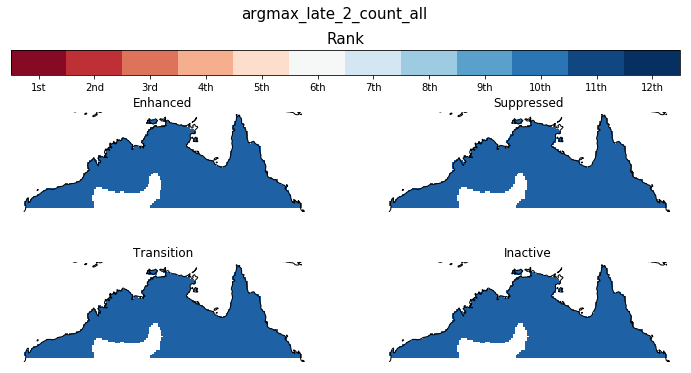

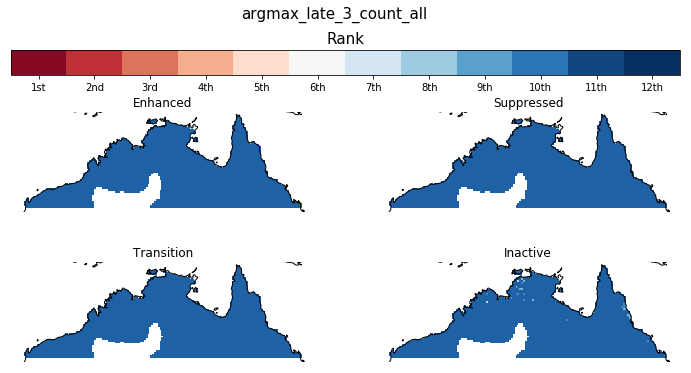

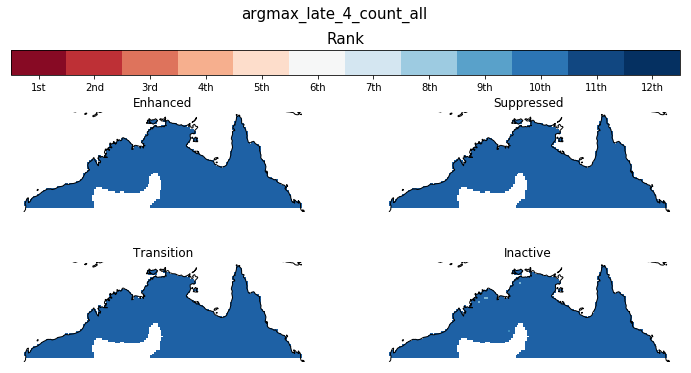

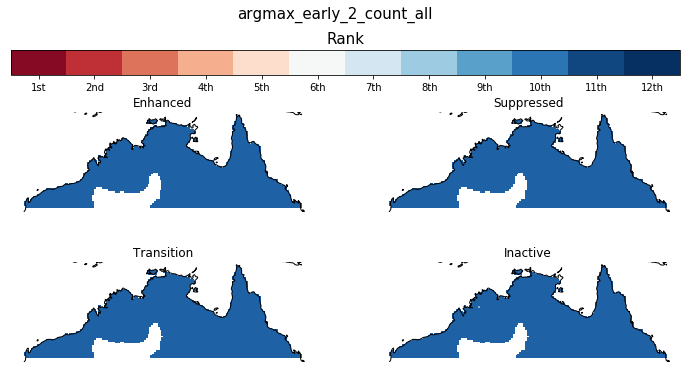

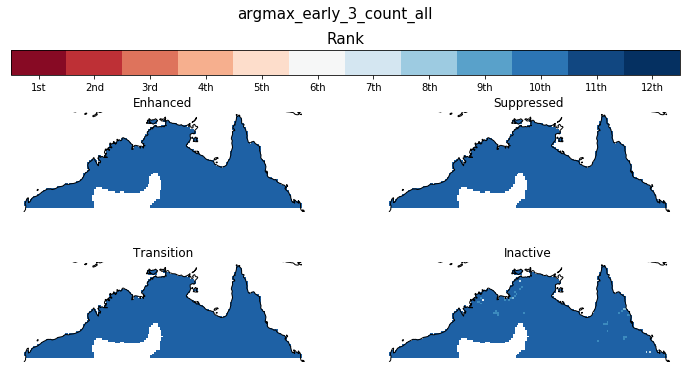

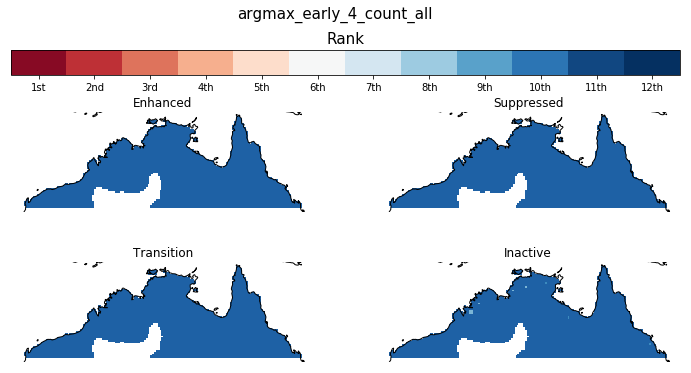

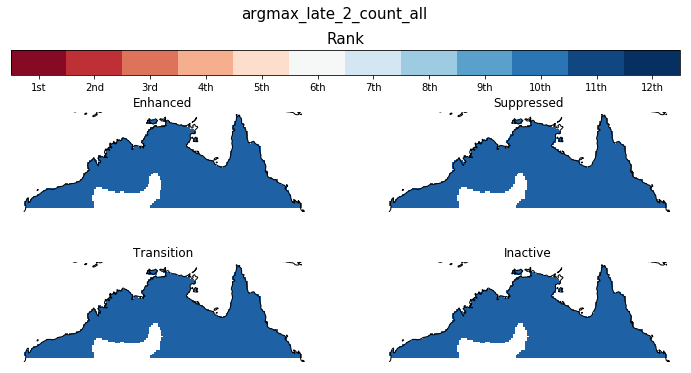

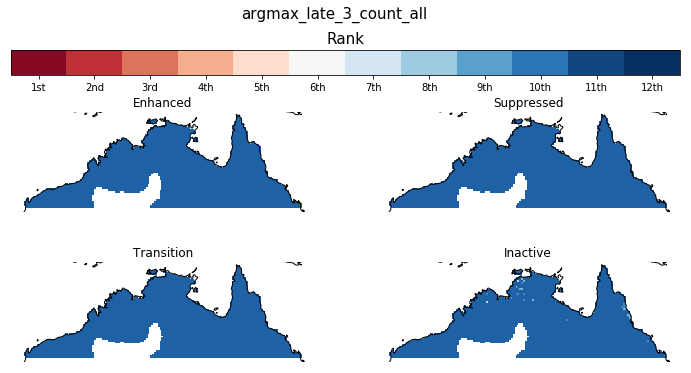

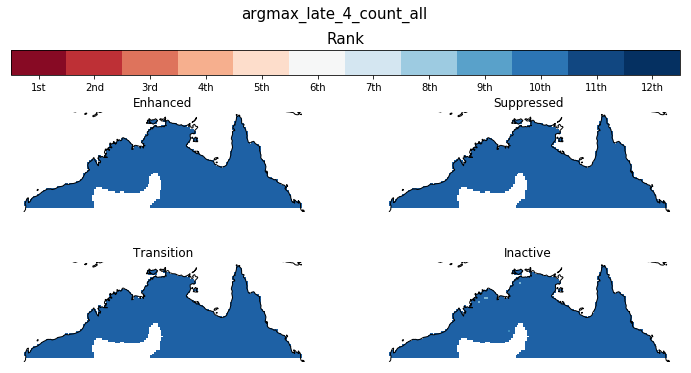

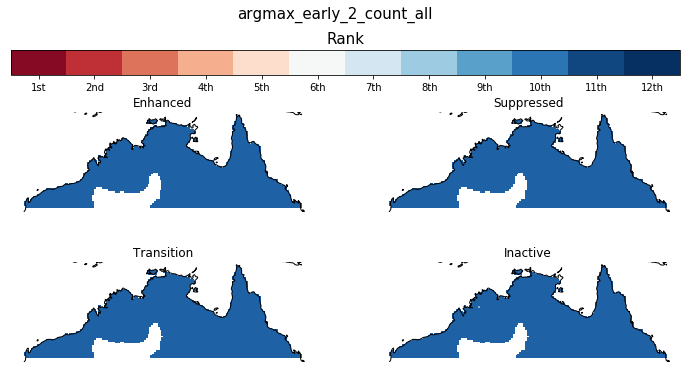

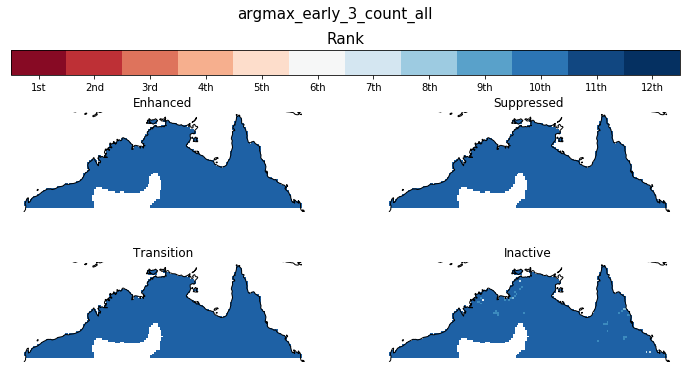

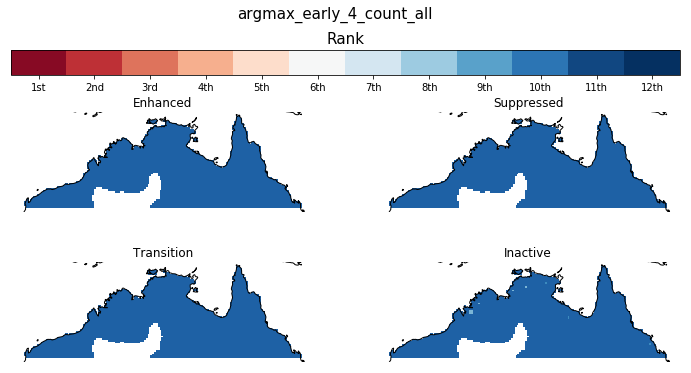

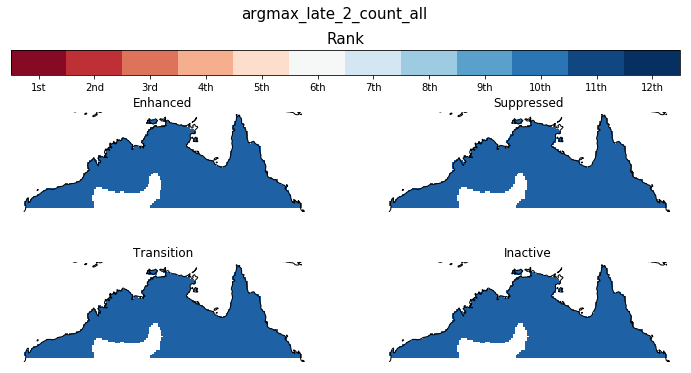

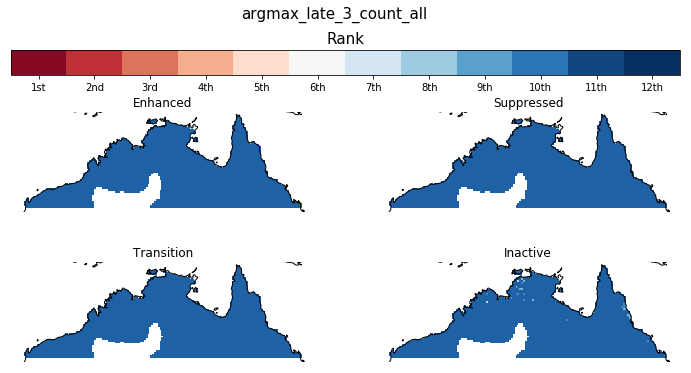

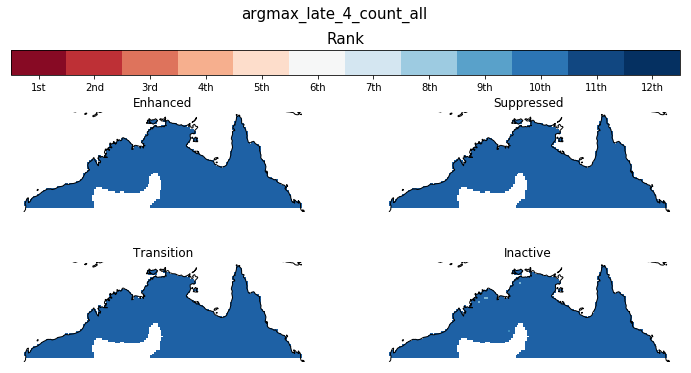

In [290]:
rhp = reload(rhp)

for phase in argmax.phase.values: #4
    for month in argmax.month.values: #2    TOTAL LOOPS = 4 x 2 x 3 = 24
        for week in argmax.week.values: #3
            data = argmax.sel( month = month, week = week)

            save_title = f'argmax_{month}_{week}_count_all'
            rhp.argmax_map_plot(data,savetitle = save_title, savedir  = savedir_rh_count_all)

### Single Point Hists

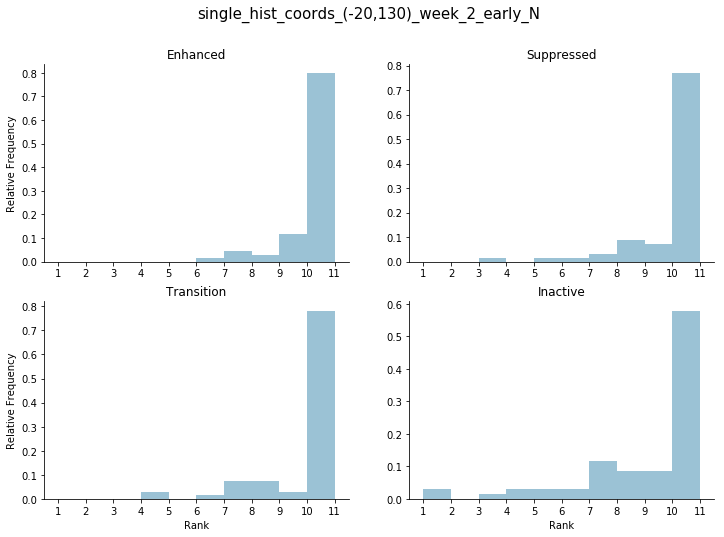

In [304]:
lat = -20
lon = 130
month = 'early'
week = '2'
data = binned_count.sel(lat = lat, lon = lon,month = month, week  = week)

save_name = f'single_hist_coords_({lat},{lon})_week_{week}_{month}_N'
rhp = reload(rhp)

rhp.generate_phase_hist(data, savedir = savedir_rh_count_all, save_name = save_name)

## Accuracy

In [422]:
awap_split

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, phase: 4, time: 4158)
Coordinates:
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * time     (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2012-12-31
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...

Creating a climatology

In [433]:
week = np.arange(7,15)
obs_sub = awap_split.where(awap_split.time.dt.day.isin(week), drop = True)

In [434]:
obs_sub

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, phase: 4, time: 1094)
Coordinates:
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * time     (time) datetime64[ns] 1990-01-07 1990-01-08 ... 2012-12-14
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...

In [437]:
rain_count = obs_sub.groupby('time.month').count()
day_count = obs_sub.fillna(0).groupby('time.month').count()

percent = rain_count * 100 / day_count

In [446]:
def group_count_rain(group):
    return group.groupby('time.year').count()


def group_count_days(group):
    return group.fillna(0).groupby('time.year').count()

In [469]:
year_percent = obs_sub.groupby('time.month').apply(group_count_rain) *100/\
                obs_sub.groupby('time.month').apply(group_count_days)

In [470]:
year_percent 

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, month: 6, phase: 4, year: 23)
Coordinates:
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * year     (year) int64 1990 1991 1992 1993 1994 ... 2008 2009 2010 2011 2012
  * month    (month) int64 1 2 3 10 11 12
Data variables:
    precip   (month, year, phase, lat, lon) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [471]:
percent

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, month: 6, phase: 4)
Coordinates:
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
  * month    (month) int64 1 2 3 10 11 12
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
Data variables:
    precip   (month, phase, lat, lon) float64 0.0 2.717 2.717 ... 0.0 0.0 0.0

In [472]:
climatoloyg = percent.sel(month = 1, phase = 'enhanced')
percent_s = year_percent.sel(month = 1, phase = 'enhanced')

In [473]:
climatoloyg

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149)
Coordinates:
    phase    <U8 'enhanced'
    month    int64 1
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
Data variables:
    precip   (lat, lon) float64 0.0 2.717 2.717 2.717 3.261 ... 0.0 0.0 0.0 0.0

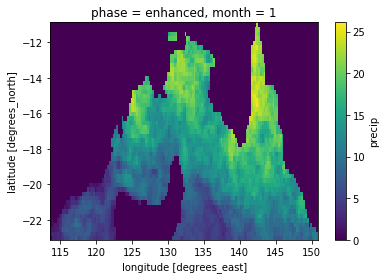

In [474]:
climatoloyg.precip.plot()

In [475]:
percent_s

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, year: 23)
Coordinates:
    phase    <U8 'enhanced'
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * year     (year) int64 1990 1991 1992 1993 1994 ... 2008 2009 2010 2011 2012
    month    int64 1
Data variables:
    precip   (year, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [476]:
years_greater = percent_s.where(percent_s.precip > climatoloyg.precip )

In [484]:
years_greater_index = years_greater.where(~np.isfinite(years_greater), 1)

In [503]:
t1 = awap.groupby('time.month').count()
t1

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, month: 6)
Coordinates:
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * month    (month) int64 1 2 3 10 11 12
Data variables:
    precip   (month, lat, lon) int64 0 87 101 113 118 119 116 ... 0 0 0 0 0 0 0

In [505]:
t2.groupby(month = [1,2,3])

TypeError: groupby() got an unexpected keyword argument 'month'

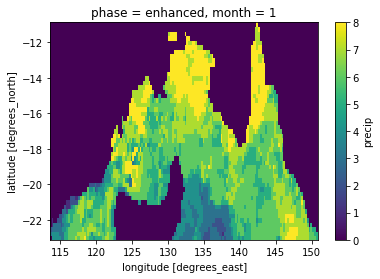

In [486]:
years_greater_index.sum(dim = 'year').precip.plot()

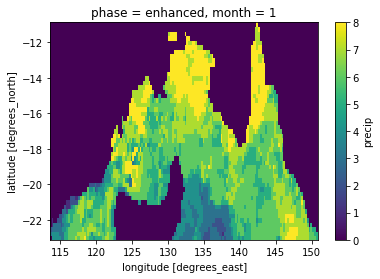

In [487]:
years_greater.count(dim = 'year').precip.plot()

# Rainfall Per Day

In [13]:
ps_w = reload(ps_w)
mean_raw, mean_anom = ps_w.mean_anomalies_phase_week(awap_split, awap, rmm_obs)

In [14]:
access_int_raw, access_int_anom, int_stor, int_anom_stor\
        = ps_w.ensemble_func_all(access, rmm_access, ps_w.mean_anomalies_phase_week)

In [15]:
access_int_raw

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, month: 2, phase: 4, week: 3)
Coordinates:
  * week     (week) object '2' '3' '4'
  * lon      (lon) float32 113.75 114.0 114.25 114.5 ... 150.25 150.5 150.75
  * month    (month) object 'early' 'late'
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
  * lat      (lat) float32 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
Data variables:
    precip   (month, week, phase, lat, lon) float32 nan 23.890759 ... nan nan

Int_4_month has been saved


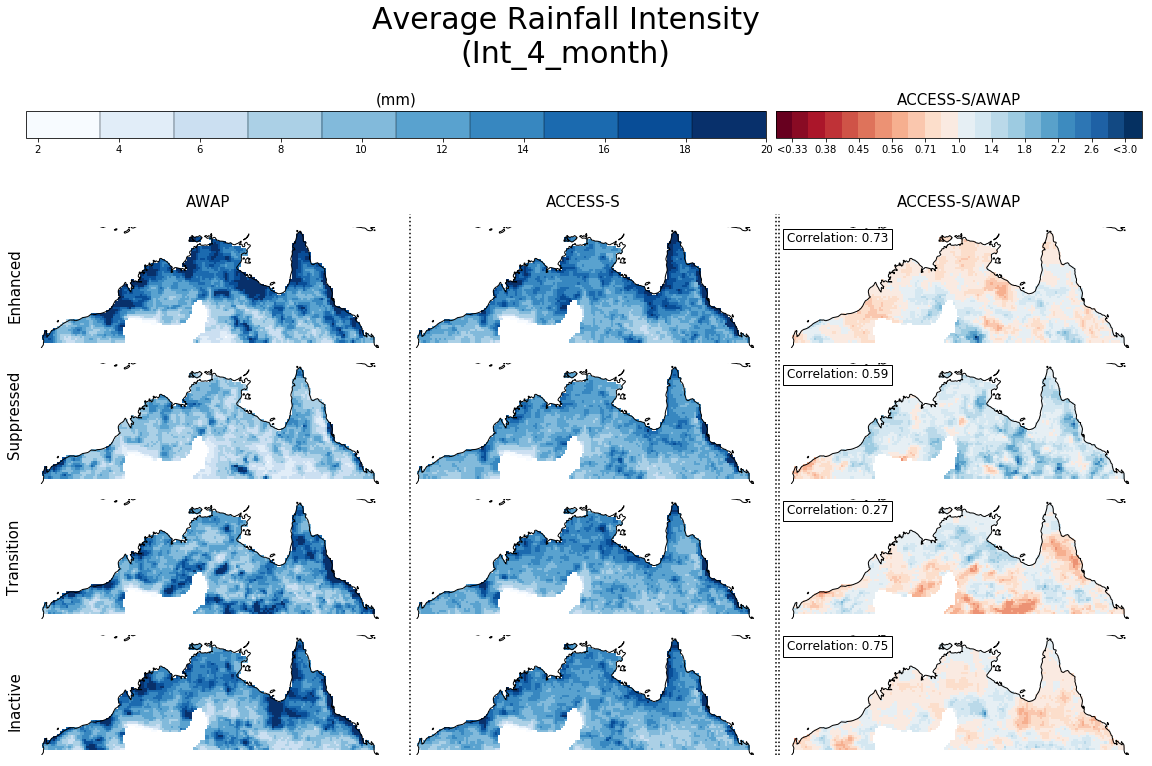

In [16]:
apf = reload(apf)

week = '4'
month = 'late'
save_name = f'Int_{week}_month'
apf.comparison_plot(mean_raw.sel(month = month, week = week), 
                           access_int_raw.sel(month = month, week = week),
                          plot_max = 20, vmax = 3.2,
                           rain_type = f'Average Rainfall Intensity\n({save_name})',
                           cbar1_title = '(mm)', cbar2_title = 'ACCESS-S/AWAP',
                          savefig = 1, savedir = savedir, save_name = save_name)

Int_2_late_anomaly has been saved


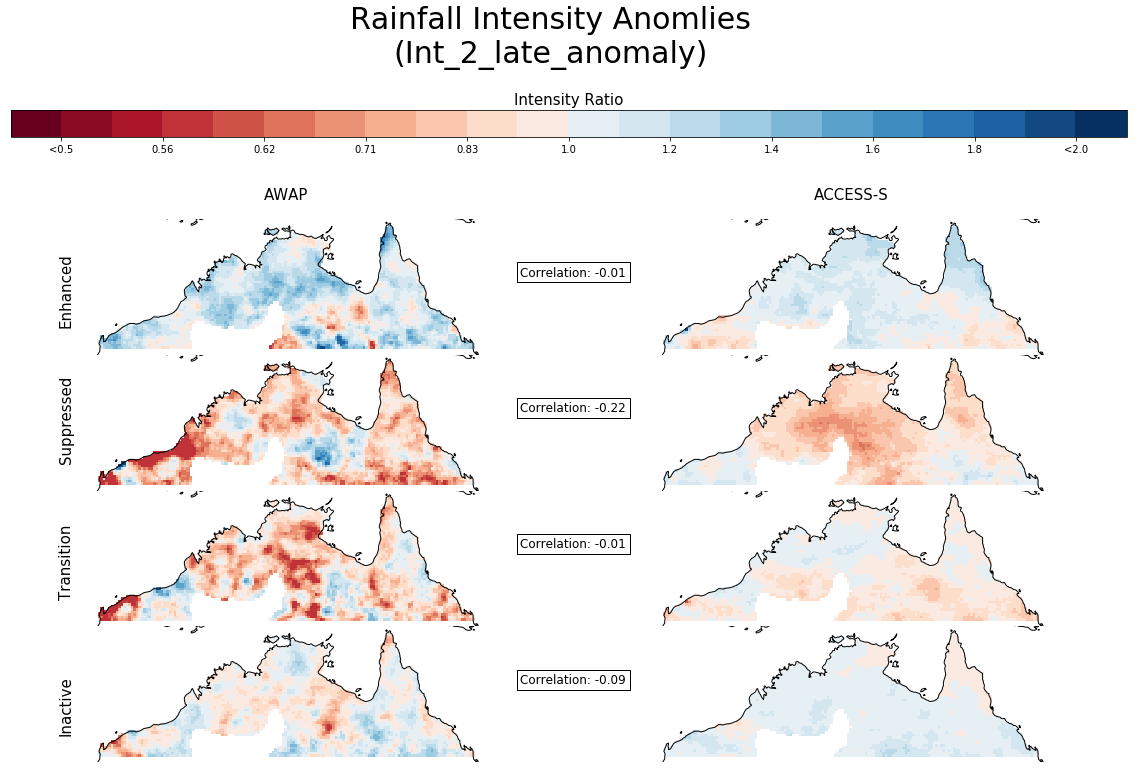

In [17]:
week = '2'
month = 'late'
save_name = f'Int_{week}_{month}_anomaly'
apf = reload(apf)
apf.anomaly_plot_subphases(mean_anom.sel(month = month, week = week),
                           access_int_anom.sel(month = month, week = week) ,
                     rain_type = f'Rainfall Intensity Anomlies\n({save_name})', vmax = 2.1
                    ,cbar_title = 'Intensity Ratio',
                    savefig = 1, savedir = savedir, save_name = save_name)